# 2.6. Probability

In [2]:
import torch
from torch.distributions import multinomial
import matplotlib.pyplot as plt
import d2l_torch as d2l

In [3]:
fair_probs = torch.ones([6]) / 6

In [4]:
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [5]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 0., 2., 3., 1., 2.])

In [6]:
# Store the results as 32-bit floats for division
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000 # Relative frequency as the estimate

tensor([0.1530, 0.1680, 0.1690, 0.1790, 0.1870, 0.1440])

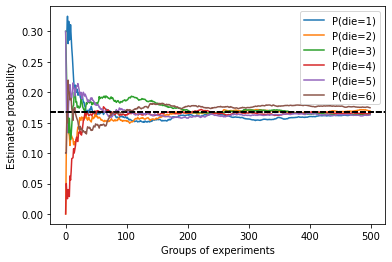

In [7]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
# plt.set_figsize((6, 4.5))
for i in range(6):
    plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
    plt.axhline(y=0.167, color='black', linestyle='dashed')
    plt.gca().set_xlabel('Groups of experiments')
    plt.gca().set_ylabel('Estimated probability')
    plt.legend();

--- 

**Marginalization**

operation of determining $P(B)$ from $P(A,B)$.
$$ P(B) = \sum_{A}P(A,B) $$

**Conditionally Independent**

Two random variable A and B are conditionally independent given another random variable $C$ if and only if $P(A,B|C) = P(A|C)P(B|C)$. 

In [8]:
import torch

print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'SigmoidTransform', 'SoftmaxTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weibull', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'bernoulli', 'beta', 'biject_to', 'binomial', 'categoric